In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('DLExp1').sheet1
data = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [ ]:
df.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = df[['Input']].values
y = df[['Output']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)
X_train1

array([[0.77777778],
       [0.37037037],
       [1.        ],
       [0.74074074],
       [0.40740741],
       [0.88888889],
       [0.        ],
       [0.81481481],
       [0.44444444],
       [0.33333333],
       [0.48148148],
       [0.66666667],
       [0.18518519],
       [0.07407407],
       [0.2962963 ],
       [0.62962963],
       [0.03703704],
       [0.85185185],
       [0.22222222],
       [0.7037037 ]])

In [ ]:
ai=Sequential([
    Dense(7,activation='relu'),
    Dense(14,activation='relu'),
    Dense(1)
])

In [ ]:
ai.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai.fit(X_train1,y_train,epochs=2000)
ai.fit(X_train1,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
Epoch 815/2000
1/1 [==============================] - 0s 7ms/step - loss: 15741.3311
Epoch 816/2000
1/1 [==============================] - 0s 7ms/step - loss: 15708.1465
Epoch 817/2000
1/1 [==============================] - 0s 7ms/step - loss: 15674.9453
Epoch 818/2000
1/1 [==============================] - 0s 6ms/step - loss: 15641.7246
Epoch 819/2000
1/1 [==============================] - 0s 8ms/step - loss: 15608.4844
Epoch 820/2000
1/1 [==============================] - 0s 10ms/step - loss: 15575.2266
Epoch 821/2000
1/1 [==============================] - 0s 6ms/step - loss: 15541.9502
Epoch 822/2000
1/1 [==============================] - 0s 6ms/step - loss: 15508.6562
Epoch 823/2000
1/1 [==============================] - 0s 7ms/step - loss: 15475.3457
Epoch 824/2000
1/1 [==============================] - 0s 7ms/step - loss: 15442.0156
Epoch 825/2000
1/1 [==============================] - 0s 12ms/step - loss: 15408.6670
Epoch 826/20

<Axes: >

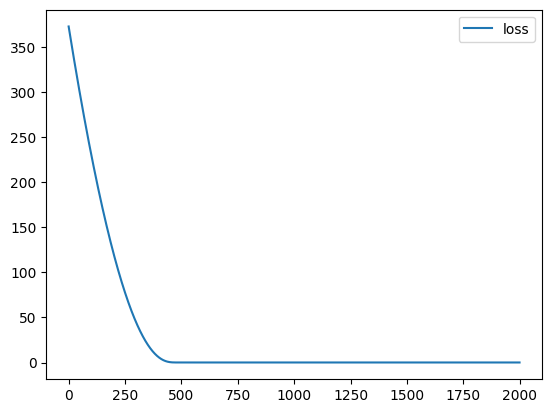

In [ ]:
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 139ms/step - loss: 0.0281


0.02810216322541237

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 447ms/step


array([[301.25238]], dtype=float32)